In [ ]:
#from pyramid.arima import auto_arima
from statsmodels.tsa.stattools import adfuller
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [ ]:
#获取测试cpu
vm_file = '/hdd/jbinin/alibaba2018_data_extraction/data/hole'
import os
import pandas as pd
def read_iterator(filepath,readNumPrecent=0.125):
    cpulist = []
    memlist = []
    files = os.listdir(filepath)
    n = int(69119*readNumPrecent)
    for idx,file in enumerate(files):
        if idx > 3:
            break
        filename = os.path.join(filepath, file)
        with open(filename) as f:
            cpus = pd.read_csv(f,iterator=True,header=None)
            cpus = cpus.get_chunk(n)
            cpu = cpus[0]#.values.squeeze().tolist()
            mem = cpus[1]#.values.squeeze().tolist()
            cpulist.append(cpu[:int(len(cpu)*readNumPrecent)])
            memlist.append(mem[:int(len(mem)*readNumPrecent)])
        print(idx,',',filename,',',n)
    return cpulist,memlist

In [ ]:
# 测试序列平稳性

def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    #迪基-福勒检验还可以扩展为增广迪基-福勒检验（Augmented Dickey-Fuller test），简称ADF检验，可检验模型是否存在单位根（unit root）
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        print(dfoutput)

## Auto arima 0.2
### 导入相关数据包

In [ ]:
from statsmodels.tsa.stattools import adfuller
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from pmdarima.arima import auto_arima
# Importing everything from forecasting quality metrics
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from math import sqrt
from sklearn import metrics

### 数据准备

In [ ]:

vm_cpu = read_iterator(vm_file)[0]
data = vm_cpu[1]
train = data[230:430]
valid = data[430:440]
train.plot()
valid.plot()
len(data)

In [ ]:
#data = vm_cpu[1]
mselist = []
valid_fore = {}
model = auto_arima(train,trace=True,start_P=0,seasonal =True,error_action='ignore',suppress_warnings=True,stepwise=False)
model.fit(train)
forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index=valid.index,columns=['prediction'])
MSE = metrics.mean_squared_error(valid,forecast)
RMSE = metrics.mean_squared_error(valid,forecast)**0.5
MAE = metrics.mean_absolute_error(valid,forecast)
MAPE = metrics.mean_absolute_percentage_error(valid,forecast)
mselist.append([MSE,RMSE,MAE,MAPE])
#valid_fore[i] = [valid.values.squeeze().tolist(),forecast.values.squeeze().tolist()]
valid.plot()

In [ ]:
forecast.plot()

### 构建模型

In [ ]:
i =0
#vm_cpu = read_vm_all_cpus(vm_file,10)
data = vm_cpu[1]
mselist = []
valid_fore = {}
while i < len(data)-200:
    train = data[i:i+200]
    valid = data[i+200:i+210]
    #no seasonal
    model = auto_arima(train,information_criterion='aic',seasonal=False,trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)
    #seasonal
    #model = auto_arima(train,trace=True,start_P=0,seasonal =True,error_action='ignore',suppress_warnings=True,stepwise=False)
    model.fit(train)
    forecast = model.predict(n_periods=len(valid))
    forecast = pd.DataFrame(forecast,index=valid.index,columns=['prediction'])
    MSE = metrics.mean_squared_error(valid,forecast)
    RMSE = metrics.mean_squared_error(valid,forecast)**0.5
    MAE = metrics.mean_absolute_error(valid,forecast)
    MAPE = metrics.mean_absolute_percentage_error(valid,forecast)
    mselist.append([MSE,RMSE,MAE,MAPE])
    i = i +10
    valid_fore[len(mselist)-1] = [valid.values.squeeze().tolist(),forecast.values.squeeze().tolist()]
    print(f'now is {i} in len  {len(data)} the value {valid_fore[len(mselist)-1] } ')


In [ ]:
mapes = [x[3] for x in mselist]
valids = [] 
for v in valid_fore.values():
    valids.append(v)
fores = [] 
for v in valid_fore.values():
    fores.append(v)
plt.plot(valids,label='true')
plt.plot(fores,label='fore')
plt.show() 

In [20]:
import numpy as np
import pandas as pd
lists = [[1],[2]]
a = np.array(lists)
train = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,
1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,
1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,
1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,
1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,
1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,
1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,
1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
#model = auto_arima(train,information_criterion='aic',seasonal=False,trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)
#seasonal
model = auto_arima(train, start_p=1, start_q=1,
                      information_criterion='aic',
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=2, max_q=2, # maximum p and q
                      m=21,              # frequency of series
                      #d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore', 
                      suppress_warnings=True,
                      stepwise=True)
model.fit(train)
forecast = model.predict(n_periods=10)
forecast

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[21] intercept   : AIC=inf, Time=1.27 sec
 ARIMA(0,0,0)(0,0,0)[21] intercept   : AIC=1085.877, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[21] intercept   : AIC=inf, Time=2.74 sec
 ARIMA(0,0,1)(0,0,1)[21] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(0,0,0)(0,0,0)[21]             : AIC=1328.925, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[21] intercept   : AIC=inf, Time=1.47 sec
 ARIMA(0,0,0)(0,0,1)[21] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(0,0,0)(1,0,1)[21] intercept   : AIC=-417.666, Time=1.53 sec
 ARIMA(0,0,0)(2,0,1)[21] intercept   : AIC=-1253.131, Time=10.34 sec
 ARIMA(0,0,0)(2,0,0)[21] intercept   : AIC=inf, Time=6.70 sec
 ARIMA(0,0,0)(2,0,2)[21] intercept   : AIC=inf, Time=10.05 sec
 ARIMA(0,0,0)(1,0,2)[21] intercept   : AIC=inf, Time=8.47 sec
 ARIMA(1,0,0)(2,0,1)[21] intercept   : AIC=-1141.160, Time=8.77 sec
 ARIMA(0,0,1)(2,0,1)[21] intercept   : AIC=-1612.189, Time=11.33 sec
 ARIMA(0,0,1)(1,0,1)[21] intercept   : AIC=inf, Time=

array([ 1.00004663,  2.00003166,  3.00002783,  4.000024  ,  5.00002016,
        6.00001633,  7.0000125 ,  8.00000866,  9.00000483, 10.000001  ])

In [22]:
forecast = model.predict(n_periods=30)
forecast

array([ 1.00004663,  2.00003166,  3.00002783,  4.000024  ,  5.00002016,
        6.00001633,  7.0000125 ,  8.00000866,  9.00000483, 10.000001  ,
       10.99999716, 11.99999333, 12.9999895 , 13.99998566, 14.99998183,
       15.999978  , 16.99997417, 17.99997033, 18.9999665 , 19.99996267,
       20.99995862,  1.00015693,  2.00011393,  3.00010013,  4.00008634,
        5.00007255,  6.00005876,  7.00004496,  8.00003117,  9.00001738])

### 检测误差
#### 一天中的数据

In [ ]:
mselist.clear()
data = vm_cpu[8]
i = 5000
train = data[:i]
valid = data[i:i+3]
model = auto_arima(train,trace=True,error_action='ignore',suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index=valid.index,columns=['prediction'])
MSE = metrics.mean_squared_error(valid,forecast)
RMSE = metrics.mean_squared_error(valid,forecast)**0.5
MAE = metrics.mean_absolute_error(valid,forecast)
MAPE = metrics.mean_absolute_percentage_error(valid,forecast)
mselist.append([MSE,RMSE,MAE,MAPE])
i = i +1 
valid_fore[i] = [valid.values.squeeze().tolist(),forecast.values.squeeze().tolist()]
#plt.plot(train,label='Train')
plt.plot(valid,label='Train')
plt.plot(forecast,label='Train')
res = sqrt(mean_squared_error(valid,forecast))
print(res)

# auto arimax 周期的准确度


In [55]:
from statsmodels.tsa.stattools import adfuller
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from pmdarima.arima import auto_arima
# Importing everything from forecasting quality metrics
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from math import sqrt
from sklearn import metrics
vm_file = '/hdd/jbinin/alibaba2018_data_extraction/data/hole/instanceid_1.csv'
with open(vm_file) as f:
    cpus = pd.read_csv(f,header=None)
    cpus = cpus[0]
train = cpus[:2000]
#valid = data[i+200:i+210]
#no seasonal
#model = auto_arima(train,information_criterion='aic',seasonal=False,trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)
#seasonal
model = auto_arima(train, start_p=1, start_q=1,
                      information_criterion='aic',
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      #d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore', 
                      suppress_warnings=True,
                      stepwise=False)
model.fit(train)
#3.8 s
# 11.2s ARIMA(2,0,0)(0,0,0)[0] m=none stepwise=true
# 22.6s p,1=5 stepwise=false

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=1392.155, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=943.827, Time=0.64 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=885.205, Time=0.27 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=886.552, Time=0.41 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=881.483, Time=0.54 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=849.728, Time=1.30 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=914.846, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=893.957, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=774.876, Time=1.50 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=846.968, Time=1.69 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=829.099, Time=2.00 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=890.084, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=892.000, Time=0.80 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=851.673, Time=2.08 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=1.83 sec
 ARIMA(3,0,0)(0,0,0)[1] inte

ARIMA(order=(4, 0, 1), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

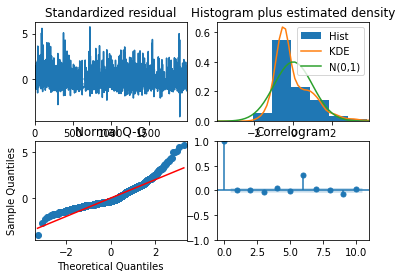

In [2]:
model.plot_diagnostics()
plt.show()

In [56]:
pred_list = []
data_test = cpus[2000:2100]
for index,row in data_test.items():
    pred_list += [model.predict(n_periods=1)]
    print(index, row)
    # 更新模型，model.update()函数，不断用新观测到的 value 更新模型
    model.update(row)
    # 预测时间序列以外未来的一次
    predict_f1 = model.predict(n_periods=1)
    print('未来一期的预测需求为：', predict_f1[0])


2000 0.21
未来一期的预测需求为： 0.295124999294613
2001 0.12
未来一期的预测需求为： 0.21241089090657042
2002 0.21
未来一期的预测需求为： 0.42536586345832483
2003 0.17
未来一期的预测需求为： 0.20350518048433805
2004 0.17
未来一期的预测需求为： 0.3878291093380809
2005 0.67
未来一期的预测需求为： 0.5116875206097194
2006 0.25
未来一期的预测需求为： 0.32540564927903676
2007 0.12
未来一期的预测需求为： 0.20061116300007623
2008 0.08
未来一期的预测需求为： 0.351400460684797
2009 0.88
未来一期的预测需求为： 0.6475327022335459
2010 1.83
未来一期的预测需求为： 1.211962807956677
2011 0.96
未来一期的预测需求为： 0.36779917355853425
2012 0.25
未来一期的预测需求为： 0.3668497661408402
2013 0.12
未来一期的预测需求为： 0.2299028667286215
2014 0.08
未来一期的预测需求为： 0.343521435077365
2015 0.33
未来一期的预测需求为： 0.33552323684517826
2016 0.54
未来一期的预测需求为： 0.5579032314586674
2017 0.5
未来一期的预测需求为： 0.34968478955853477
2018 0.54
未来一期的预测需求为： 0.5476148965427194
2019 0.21
未来一期的预测需求为： 0.1936061964667945
2020 0.12
未来一期的预测需求为： 0.3589851980361307
2021 0.12
未来一期的预测需求为： 0.217060416563804
2022 0.17
未来一期的预测需求为： 0.3786824820719229
2023 0.46
未来一期的预测需求为： 0.4020385326779808
2024 0.29
未来一期

In [49]:
# ARIMA模型评价
def forecast_accuracy(forecast_ori, actual_ori):
    forecast = []
    actual = []
    for idx,ele in enumerate(actual_ori):
        if ele != 0:
            actual.append(ele*1000)
            forecast.append(forecast_ori[idx]*1000)
    forecast =np.array(forecast)
    actual = np.array(actual)
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))
    me = np.mean(forecast - actual)
    mae = np.mean(np.abs(forecast - actual))
    mpe = np.mean((forecast - actual)/actual)
    rmse = np.mean((forecast - actual)**2)**0.5    # RMSE
    rmse_1 = np.sqrt(sum((forecast - actual) ** 2) / actual.size)
    corr = np.corrcoef(forecast, actual)[0, 1]
    mins = np.amin(np.hstack([forecast[:, None], actual[:, None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:, None], actual[:, None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)
    return ({'mape': mape,
             'me': me,
             'mae': mae,
             'mpe': mpe,
             'rmse': rmse,
             'corr': corr,
             'minmax': minmax
             })


模型评价结果
 {'mape': 0.6682728750464636, 'me': -18.782244897395948, 'mae': 211.2346573341748, 'mpe': 0.3634068354463347, 'rmse': 270.09241361206796, 'corr': 0.5099660235963412, 'minmax': 0.38363734678680406}


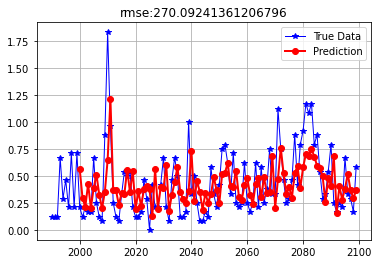

In [57]:
test_predict = data_test.copy()
for x in range(len(test_predict)):
    test_predict.iloc[x] = pred_list[x]
# 模型评价
eval_result = forecast_accuracy(test_predict.values, data_test.values)
print('模型评价结果\n', eval_result)
# 画图显示
plt.plot(cpus[1990:2100], 'b-', lw=1, label='True Data', marker='*')
plt.plot(test_predict, 'r-', lw=2, label='Prediction', marker='o')
plt.title('rmse:{}'.format(eval_result['rmse']))
plt.legend(loc='best')
plt.grid()  # 生成网格
plt.show()
# rmse  0.28

## 非周期的准确度

In [28]:
from statsmodels.tsa.stattools import adfuller
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from pmdarima.arima import auto_arima
# Importing everything from forecasting quality metrics
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from math import sqrt
from sklearn import metrics
vm_file = '/hdd/jbinin/alibaba2018_data_extraction/data/hole/instanceid_9.csv'
with open(vm_file) as f:
    cpus_nofre = pd.read_csv(f,header=None)
    cpus_nofre = cpus_nofre[0]
wins = 10000
train_nofre = cpus_nofre[:wins]
#valid = data[i+200:i+210]
#no seasonal
#model = auto_arima(train,information_criterion='aic',seasonal=False,trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)
#seasonal
model_nofre = auto_arima(train_nofre, start_p=2, start_q=2,
                      information_criterion='aic',
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      #m=864,              # frequency of series
                      #d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore', 
                      suppress_warnings=True,
                      stepwise=True)
model_nofre.fit(train)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-128092.150, Time=1.45 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-128100.150, Time=0.30 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-128098.150, Time=0.32 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-128098.149, Time=0.76 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-128096.149, Time=0.96 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-128099.150, Time=0.99 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 4.847 seconds


ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

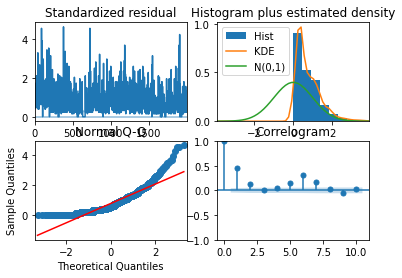

In [29]:
model_nofre.plot_diagnostics()
plt.show()

In [30]:
pred_list_nofre = []
data_test_nofre = cpus_nofre[wins:wins+100]
for index,row in data_test_nofre.items():
    pred_list_nofre += [model_nofre.predict(n_periods=1)]
    print(index, row)
    # 更新模型，model.update()函数，不断用新观测到的 value 更新模型
    model_nofre.update(row)
    # 预测时间序列以外未来的一次
    predict_f1_nofre = model_nofre.predict(n_periods=1)
    print('未来一期的预测需求为：', predict_f1_nofre[0])


10000 0.0
未来一期的预测需求为： 0.0
10001 0.0
未来一期的预测需求为： 0.0
10002 0.0
未来一期的预测需求为： 0.0
10003 0.0
未来一期的预测需求为： 0.0
10004 0.0
未来一期的预测需求为： 0.0
10005 0.0
未来一期的预测需求为： 0.0
10006 0.0
未来一期的预测需求为： 0.0
10007 0.0
未来一期的预测需求为： 0.0
10008 0.0
未来一期的预测需求为： 0.0
10009 0.0
未来一期的预测需求为： 0.0
10010 0.0
未来一期的预测需求为： 0.0
10011 0.0
未来一期的预测需求为： 0.0
10012 0.0
未来一期的预测需求为： 0.0
10013 0.0
未来一期的预测需求为： 0.0
10014 0.0
未来一期的预测需求为： 0.0
10015 0.0
未来一期的预测需求为： 0.0
10016 0.0
未来一期的预测需求为： 0.0
10017 0.0
未来一期的预测需求为： 0.0
10018 0.0
未来一期的预测需求为： 0.0
10019 0.0
未来一期的预测需求为： 0.0
10020 0.0
未来一期的预测需求为： 0.0
10021 0.0
未来一期的预测需求为： 0.0
10022 0.0
未来一期的预测需求为： 0.0
10023 0.0
未来一期的预测需求为： 0.0
10024 0.0
未来一期的预测需求为： 0.0
10025 0.0
未来一期的预测需求为： 0.0
10026 0.0
未来一期的预测需求为： 0.0
10027 0.0
未来一期的预测需求为： 0.0
10028 0.0
未来一期的预测需求为： 0.0
10029 0.0
未来一期的预测需求为： 0.0
10030 0.0
未来一期的预测需求为： 0.0
10031 0.0
未来一期的预测需求为： 0.0
10032 0.0
未来一期的预测需求为： 0.0
10033 0.0
未来一期的预测需求为： 0.0
10034 0.0
未来一期的预测需求为： 0.0
10035 0.0
未来一期的预测需求为： 0.0
10036 0.0
未来一期的预测需求为： 0.0
10037 0.0
未来一期的预测需求为： 0.0
10038 0.0
未来

模型评价结果
 {'mape': inf, 'me': -0.015763269476504048, 'mae': 0.22384696306686142, 'mpe': inf, 'rmse': 0.28149744581738756, 'corr': 0.44998992834958507, 'minmax': 0.41240065386619595}


/tmp/ipykernel_15823/1553445765.py:3: RuntimeWarning: invalid value encountered in true_divide
  mape = np.mean(np.abs(forecast - actual)/np.abs(actual))
/tmp/ipykernel_15823/1553445765.py:6: RuntimeWarning: invalid value encountered in true_divide
  mpe = np.mean((forecast - actual)/actual)
/root/anaconda3/envs/tf_lsh/lib/python3.8/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/tmp/ipykernel_15823/1553445765.py:12: RuntimeWarning: invalid value encountered in true_divide
  minmax = 1 - np.mean(mins/maxs)


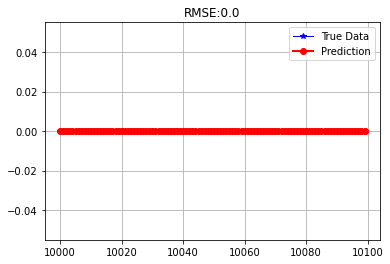

In [31]:
test_predict_nofre = data_test_nofre.copy()
for x in range(len(test_predict_nofre)):
    test_predict_nofre.iloc[x] = pred_list_nofre[x]
# 模型评价
eval_result_nofre = forecast_accuracy(test_predict_nofre.values, data_test_nofre.values)
print('模型评价结果\n', eval_result)
# 画图显示
plt.plot(data_test_nofre, 'b-', lw=1, label='True Data', marker='*')
plt.plot(test_predict_nofre, 'r-', lw=2, label='Prediction', marker='o')
plt.title('RMSE:{}'.format(eval_result_nofre['rmse']))
plt.legend(loc='best')
plt.grid()  # 生成网格
plt.show()
